In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from pycaret.classification import *

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../input/datasets_4458_8204_winequality-red.csv')

In [4]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [5]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
x = data.drop(columns='quality')
y = data['quality']

<AxesSubplot:xlabel='quality', ylabel='count'>

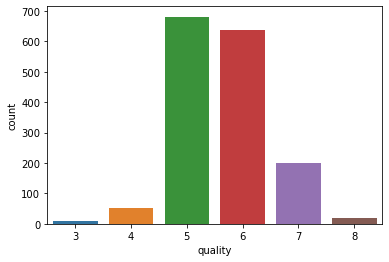

In [7]:
sns.countplot(y)

In [8]:
from imblearn.over_sampling import BorderlineSMOTE
from cuml.manifold import TSNE
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [13]:
ex = setup(data, target='quality')

Setup Succesfully Completed!


,Description,Value
0,session_id,8428
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(1599, 12)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
compare_models(blacklist=['catboost']);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.6711,0,0.3418,0.638,0.6502,0.466,0.4698,0.8329
1,Random Forest Classifier,0.6613,0,0.3446,0.6345,0.6443,0.4558,0.4585,0.2333
2,Extreme Gradient Boosting,0.6568,0,0.3431,0.6314,0.6389,0.4461,0.4498,0.435
3,Light Gradient Boosting Machine,0.6542,0,0.3377,0.6242,0.6357,0.4404,0.4434,0.3748
4,Gradient Boosting Classifier,0.6291,0,0.3376,0.6097,0.6133,0.4013,0.4042,0.9878
5,Ada Boost Classifier,0.5809,0,0.2959,0.5591,0.5647,0.321,0.3235,0.4555
6,Linear Discriminant Analysis,0.5764,0,0.2979,0.5472,0.555,0.3122,0.3161,0.0289
7,Ridge Classifier,0.5746,0,0.2455,0.4865,0.5197,0.2769,0.2874,0.0572
8,Logistic Regression,0.5719,0,0.2539,0.5294,0.5305,0.2792,0.2871,0.5281
9,Naive Bayes,0.5567,0,0.3138,0.5564,0.5545,0.3123,0.3135,0.0186


In [15]:
model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7321,0,0.3514,0.7007,0.7107,0.5589,0.5633
1,0.6696,0,0.3109,0.6425,0.6504,0.4607,0.4653
2,0.6696,0,0.3286,0.6301,0.6482,0.466,0.4684
3,0.6161,0,0.3071,0.589,0.6006,0.3811,0.3828
4,0.6696,0,0.3217,0.6444,0.6524,0.4691,0.4742
5,0.6964,0,0.3403,0.6692,0.6788,0.5095,0.5133
6,0.7054,0,0.4022,0.6684,0.6776,0.516,0.5234
7,0.6518,0,0.3468,0.606,0.6222,0.4295,0.4344
8,0.6429,0,0.4018,0.6076,0.6237,0.4325,0.4344
9,0.6577,0,0.3069,0.6217,0.6377,0.4366,0.4387


In [16]:
y_pred = predict_model(model, data=x_test)

In [17]:
y_pred.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label
0,8.8,0.47,0.49,2.9,0.085,17.0,110.0,0.9982,3.29,0.60,9.8,5
1,10.8,0.26,0.45,3.3,0.060,20.0,49.0,0.9972,3.13,0.54,9.6,5


In [18]:
y_pred = y_pred['Label']

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
y_test.shape, y_pred.shape

((480,), (480,))

In [21]:
accuracy_score(y_test, y_pred)

0.9041666666666667